**NOTE:** First, be sure to check my 00... notebook for a note about GPU utilization on my personal system.
    
**SOURCE:** I'm building this notebook based on a Udemy course, I'll link to the Github and Udemy course below this line.
    
**Udemy:** https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/
    
**Github:** https://github.com/mrdbourke/tensorflow-deep-learning

# Introduction to regression with Neural Networkds in TensorFlow

Predicting a numerical variable based on a collection of feature variables.

In [3]:
# Tensorflow logging info that is non-critical is annoying
# using this to reduce clutter
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [4]:
# Import TensorFlow
import tensorflow as tf
tf.__version__
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU


2023-01-02 09:26:24.536514: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.


## Create data to view and fit

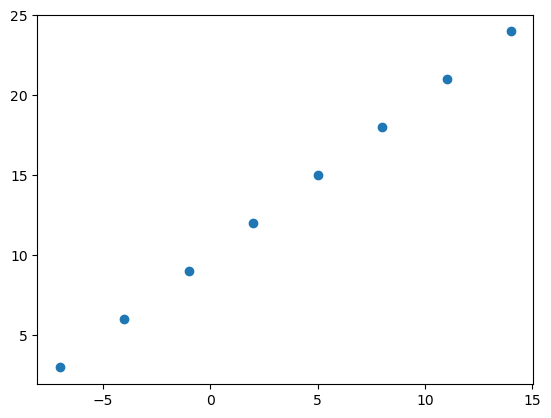

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
tf.random.set_seed(42)

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y);

## Input and Output shapes

In [6]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# these are scalars, zero dimensions
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

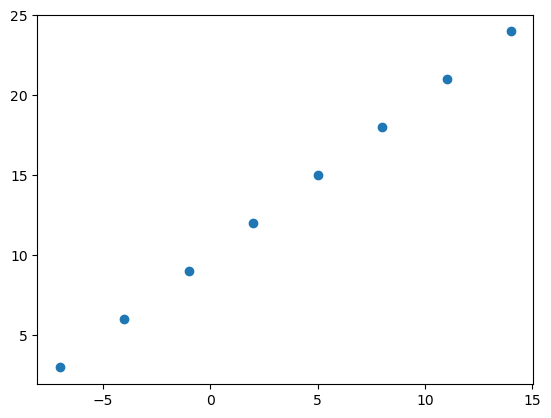

In [11]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as a well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (how wrong is it?), optimizer (how to improve?), and evaluation metrics (how good have we done?)
3. **Fitting a model** - letting the model try to find patterns between X and y  or features and labels.

In [12]:
# UPDATE WITH TensorFlow 2.7 and above
# scalars don't get fixed automatically, in this case we're converting from a scalar to a matrix with expansion
# -1 in this case means add it to the end of the array, -1 being the last index of any length array
print("Before: ", X.shape, X.ndim)
if tf.rank(X).numpy() == 1:
    X = tf.expand_dims(X, axis=-1 )
    
print("After: ", X.shape, X.ndim)

Before:  (8,) 1
After:  (8, 1) 2


In [13]:
# 1. Create model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error, mean(abs(label - pred), axis=1)
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"]) # stochastic gradient descent

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 9.0966 - mae: 9.0966
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 8.9641 - mae: 8.9641
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 8.8316 - mae: 8.8316
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 8.6991 - mae: 8.6991
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 8.5666 - mae: 8.5666


In [14]:
# check X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# make a prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 54ms/step


In [16]:
y_pred + 11

array([[35.412964]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create it

1. **Creating a model** - here we might add layers, neurons, change the activation function of each layer
2. **Compiling a model** - here we might change the optimization function or learning rate
3. **Fitting the model** - increate epochs or increase amount of data

In [17]:
# rebuild model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (increase epochs here)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 151ms/step - loss: 14.5413 - mae: 14.5413
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.4088 - mae: 14.4088
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.2763 - mae: 14.2763
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 14.1438 - mae: 14.1438
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 14.0113 - mae: 14.0113
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8788 - mae: 13.8788
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7463 - mae: 13.7463
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6138 - mae: 13.6138
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4813 - mae: 13.4813
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3488 - mae: 13.3488
Epoch 11/100
1/1 [==============================] - 0s 6m

1/1 [==============================] - 0s 6ms/step - loss: 6.9038 - mae: 6.9038
Epoch 89/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8981 - mae: 6.8981
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8925 - mae: 6.8925
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8869 - mae: 6.8869
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8813 - mae: 6.8813
Epoch 93/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8756 - mae: 6.8756
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8700 - mae: 6.8700
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8644 - mae: 6.8644
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8588 - mae: 6.8588
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8531 - mae: 6.8531
Epoch 98/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8475 - ma

In [18]:
# check if prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 41ms/step


array([[29.74974]], dtype=float32)

In [19]:
# Another change to the model

# 1. Create the model (add another layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=.01),
             metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=50)

Epoch 1/50


/home/raistlind2x/miniconda3/envs/tensorflow-developer-certification/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 721ms/step - loss: 13.2564 - mae: 13.2564
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 12.2807 - mae: 12.2807
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 11.3010 - mae: 11.3010
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 10.3132 - mae: 10.3132
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 9.3111 - mae: 9.3111
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 8.2864 - mae: 8.2864
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 7.2308 - mae: 7.2308
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 6.7403 - mae: 6.7403
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 7.3132 - mae: 7.3132
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 7.9482 - mae: 7.9482
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 8.1737 - mae

In [20]:
# Check new prediction test
# Appears to be overfitting on the training data, learning the training data too well to generalize
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[26.870178]], dtype=float32)

**NOTES:**
    
1. Adding layers
2. Adding hidden units or neurons
3. Change activation function
4. Change optimization function
5. Change learning rate `Adam(lr=.01)` made the most impact
6. Fitting for longer/increase epochs

## Evaluate a model

In practice, a typical workflow when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak it ->
fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

> visualize, visualize, visualize when evaluating data

It's a good idea to visualize:
* The data - what data are we working with, what does it look like?
* The model itself - what does it look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model compare against the ground truth/labels?

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10

# ^ creates a formula of adding +10 to each X value

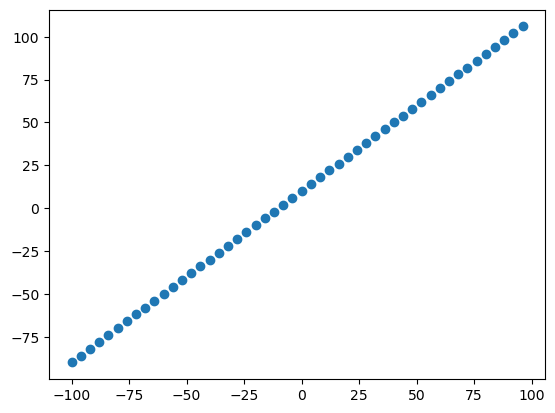

In [23]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - The model learns from this data, typically 70 - 80% of the data
* **Validation set** - Model gets tuned (hyperparameter tuning) on this data. 10 - 15%
* **Test set** - Model gets evaluated on this set. 10 - 15%

In [24]:
# how many samples do we have
len(X)

50

In [25]:
# Split the data into train and test
X_train = X[:40] # first 40 == 80%
X_test = X[40:] # last 10 == 20%

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now data is in training and test sets, need to visualize it.

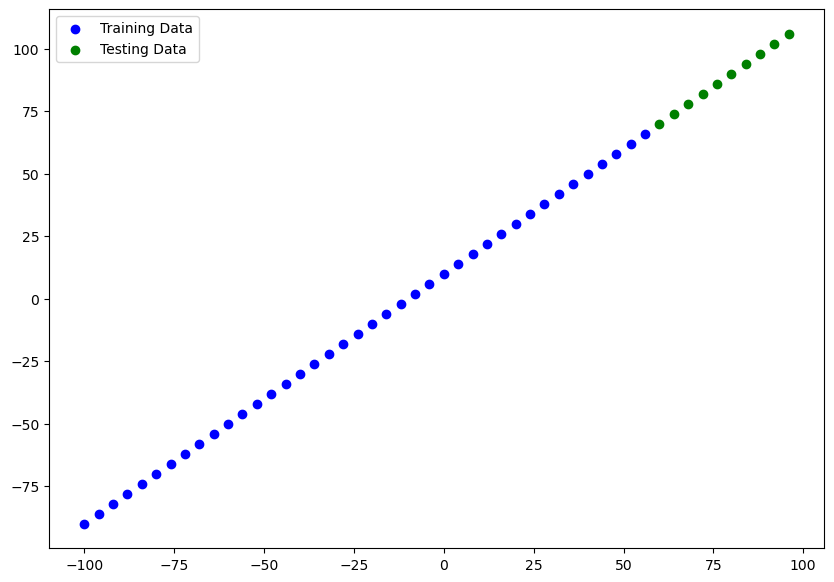

In [26]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [27]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. fit the model, ONLY USE TRAINING DATA
# model.fit(X_train, y_train, epochs=100)

## visualize the model

In [28]:
# Create model that builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=.01),
             metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in model, these are what the model will learn
* Trainable params - these are the parameters that the model can update as it trains
* non-trainable params - these params aren't updated during training, typically occurs when you freeze params from previously trained models (transfer learning)

**RESOURCE:** <a href="https://www.youtube.com/watch?v=7sB052Pz0sQ" title="MIT Introduction to Deep Learning">MIT Introduction to Deep Learning</a>

In [29]:
# Fit model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [30]:
# Get a summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


### Visualizing model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often seen in the wild in the form of `y_test` or `y_true` versus `y_pred`

In [31]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 36ms/step


array([[ 70.1119  ],
       [ 74.11035 ],
       [ 78.108795],
       [ 82.107254],
       [ 86.10569 ],
       [ 90.10414 ],
       [ 94.10259 ],
       [ 98.10104 ],
       [102.09949 ],
       [106.09793 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
# Create function to visualize y_pred vs y_true
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training and test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    
    # PLot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    # Plot model predicitons in red
    print("Test data: ", test_data)
    print("Predictions: ", predictions)
    print("Prediction length: ", len(predictions))
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    
    # Show legend
    plt.legend()

Test data:  tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
Predictions:  [[ 70.1119  ]
 [ 74.11035 ]
 [ 78.108795]
 [ 82.107254]
 [ 86.10569 ]
 [ 90.10414 ]
 [ 94.10259 ]
 [ 98.10104 ]
 [102.09949 ]
 [106.09793 ]]
Prediction length:  10


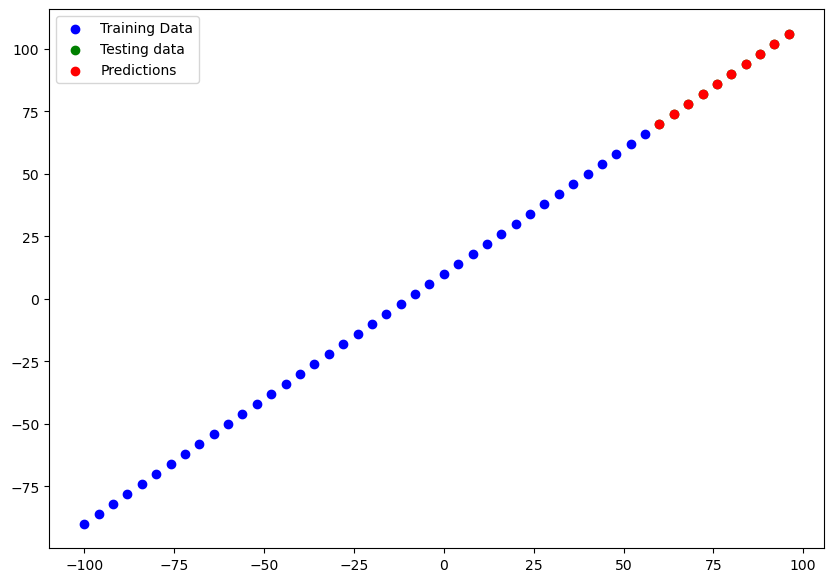

In [34]:
plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating the models predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different metrics for evaluation.

Regression = 2 main metrics:

* MAE - Mean absolute error
* MSE - Mean square error

In [35]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 85ms/step - loss: 0.1049 - mae: 0.1049


[0.10491867363452911, 0.10491867363452911]

In [36]:
# calculate MSE between y_pred and y_test
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.91048  , 14.733789 , 12.3564825, 10.778549 , 10.       ,
       10.020828 , 10.841037 , 12.460627 , 14.87959  , 18.09793  ],
      dtype=float32)>

In [37]:
# convert y_pred to tensor
y_pred = tf.constant(y_pred)

# shapes aren't the same
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.1119  ],
        [ 74.11035 ],
        [ 78.108795],
        [ 82.107254],
        [ 86.10569 ],
        [ 90.10414 ],
        [ 94.10259 ],
        [ 98.10104 ],
        [102.09949 ],
        [106.09793 ]], dtype=float32)>)

In [38]:
# removes the '1' dimension so they are the same shape
y_pred = tf.squeeze(y_pred)

In [39]:
# calculate the mean absolute error again
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.10491867>

In [40]:
# calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.011027797>

In [41]:
def regression_metrics(y_test, y_pred):
    """
    Output MAE and  MSE
    """
    # squeeze preds to make same shape for evaluation
    y_pred = tf.squeeze(y_pred)
    
    # MAE
    mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print("MAE: ", mae.numpy())
    
    # MSE
    mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
    print("MSE: ", mse.numpy())

In [42]:
regression_metrics(y_test, y_pred)

MAE:  0.10491867
MSE:  0.011027797


3 modeling experiments:
    
1. `model_1`: 1 layers, trained for 100 epochs
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs

**Build model_1**

In [43]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model_1.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3891 - mae: 15.3891
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2504 - mae: 13.2504
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 19.2468 - mae: 19.2468
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2141 - mae: 10.2141
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 12.3114 - mae: 12.3114
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.8635 - mae: 12.8635
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7895 - mae: 10.7895
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9307 - mae: 13.9307
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 14.8449 - mae: 14.8449
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.0021 - mae: 10.0021
Epoch 11/100
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step - loss: 8.6895 - mae: 8.6895
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8326 - mae: 8.8326
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6420 - mae: 8.6420
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6920 - mae: 8.6920
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5587 - mae: 8.5587
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1505 - mae: 9.1505
Epoch 94/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9062 - mae: 9.9062
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 12.8541 - mae: 12.8541
Epoch 96/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1473 - mae: 9.1473
Epoch 97/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5522 - mae: 10.5522
Epoch 98/100
2/2 [==============================] - 0s 7ms/step - loss: 14.7801

1/1 [==============================] - 0s 28ms/step
Test data:  tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
Predictions:  [[54.6453  ]
 [58.180492]
 [61.715683]
 [65.25088 ]
 [68.78607 ]
 [72.32126 ]
 [75.85645 ]
 [79.39165 ]
 [82.926834]
 [86.46203 ]]
Prediction length:  10


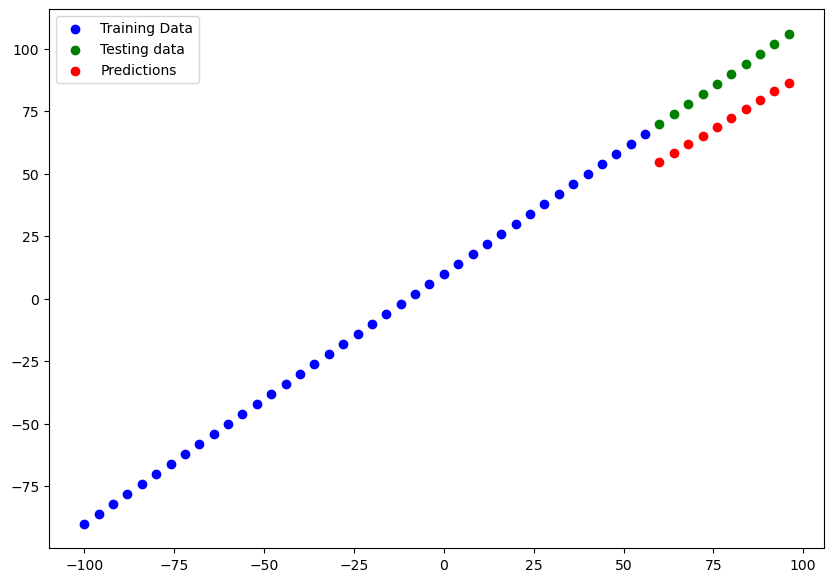

In [44]:
# make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

# convert y_preds_1 to tensor
y_preds_1 = tf.constant(y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics
results_1 = regression_metrics(y_test, y_preds_1)

MAE:  17.446335
MSE:  306.15698


**Build `model_2`**

2 Dense layers, trained for 100 epochs

In [46]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=.01),
             metrics=["mae"])

# 3. fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 56ms/step - loss: 50.4424 - mae: 50.4424
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 37.8514 - mae: 37.8514
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 26.7093 - mae: 26.7093
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 14.7020 - mae: 14.7020
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 6.3256 - mae: 6.3256
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.8719 - mae: 10.8719
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 13.0992 - mae: 13.0992
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.6999 - mae: 10.6999
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 6.8689 - mae: 6.8689
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 5.4335 - mae: 5.4335
Epoch 11/100
2/2 [==============================] - 0s 9ms/st

2/2 [==============================] - 0s 8ms/step - loss: 1.3328 - mae: 1.3328
Epoch 89/100
2/2 [==============================] - 0s 10ms/step - loss: 0.9189 - mae: 0.9189
Epoch 90/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0913 - mae: 1.0913
Epoch 91/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3850 - mae: 0.3850
Epoch 92/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3770 - mae: 0.3770
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1515 - mae: 1.1515
Epoch 94/100
2/2 [==============================] - 0s 10ms/step - loss: 0.6275 - mae: 0.6275
Epoch 95/100
2/2 [==============================] - 0s 8ms/step - loss: 1.5394 - mae: 1.5394
Epoch 96/100
2/2 [==============================] - 0s 8ms/step - loss: 0.7296 - mae: 0.7296
Epoch 97/100
2/2 [==============================] - 0s 9ms/step - loss: 0.9385 - mae: 0.9385
Epoch 98/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2836 - 

1/1 [==============================] - 0s 33ms/step
Test data:  tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
Predictions:  [[ 69.39563 ]
 [ 73.36359 ]
 [ 77.33153 ]
 [ 81.299484]
 [ 85.267426]
 [ 89.23538 ]
 [ 93.20333 ]
 [ 97.17128 ]
 [101.13923 ]
 [105.10717 ]]
Prediction length:  10


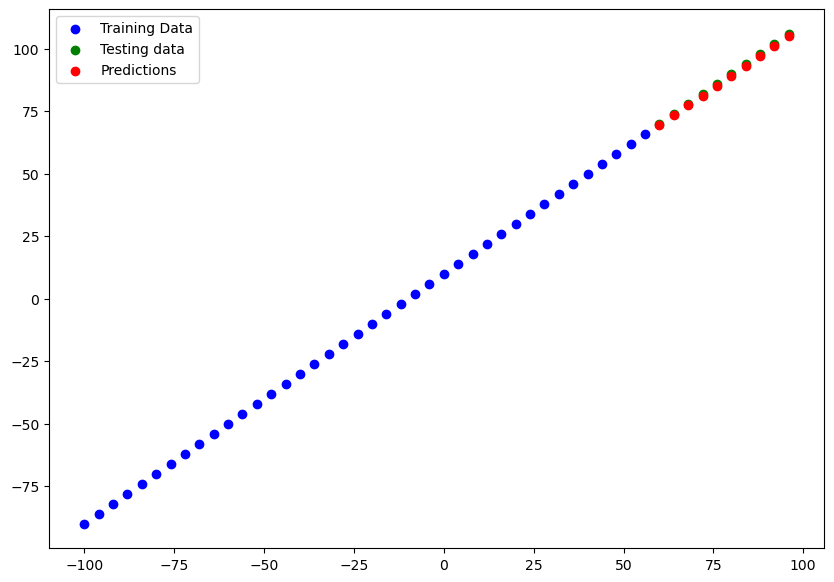

In [47]:
# make predictions
y_preds_2 = model_2.predict(X_test)
len(y_preds_2), len(X_test), len(X_train), len(y_test)
plot_predictions(predictions=y_preds_2)

In [48]:
# view evaluation metrics
results_2 = regression_metrics(y_test, y_preds_2)
results_2

MAE:  0.7485954
MSE:  0.56887


### Model 3

In [49]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=.01),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 49.1069 - mae: 49.1069
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 40.2175 - mae: 40.2175
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 32.6021 - mae: 32.6021
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 24.2707 - mae: 24.2707
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 15.7727 - mae: 15.7727
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 8.1114 - mae: 8.1114
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 6.2285 - mae: 6.2285
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 10.1051 - mae: 10.1051
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 11.0453 - mae: 11.0453
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 9.6346 - mae: 9.6346
Epoch 11/200
2/2 [==============================] - 0s 9ms/ste

2/2 [==============================] - 0s 9ms/step - loss: 1.2146 - mae: 1.2146
Epoch 89/200
2/2 [==============================] - 0s 9ms/step - loss: 1.3006 - mae: 1.3006
Epoch 90/200
2/2 [==============================] - 0s 9ms/step - loss: 1.1014 - mae: 1.1014
Epoch 91/200
2/2 [==============================] - 0s 7ms/step - loss: 1.1059 - mae: 1.1059
Epoch 92/200
2/2 [==============================] - 0s 8ms/step - loss: 1.0389 - mae: 1.0389
Epoch 93/200
2/2 [==============================] - 0s 8ms/step - loss: 0.8204 - mae: 0.8204
Epoch 94/200
2/2 [==============================] - 0s 7ms/step - loss: 1.0415 - mae: 1.0415
Epoch 95/200
2/2 [==============================] - 0s 9ms/step - loss: 0.8033 - mae: 0.8033
Epoch 96/200
2/2 [==============================] - 0s 9ms/step - loss: 0.7615 - mae: 0.7615
Epoch 97/200
2/2 [==============================] - 0s 7ms/step - loss: 0.9206 - mae: 0.9206
Epoch 98/200
2/2 [==============================] - 0s 10ms/step - loss: 0.4297 - m

2/2 [==============================] - 0s 9ms/step - loss: 0.3307 - mae: 0.3307
Epoch 176/200
2/2 [==============================] - 0s 10ms/step - loss: 0.8493 - mae: 0.8493
Epoch 177/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2801 - mae: 0.2801
Epoch 178/200
2/2 [==============================] - 0s 7ms/step - loss: 0.9246 - mae: 0.9246
Epoch 179/200
2/2 [==============================] - 0s 9ms/step - loss: 0.4938 - mae: 0.4938
Epoch 180/200
2/2 [==============================] - 0s 9ms/step - loss: 0.5789 - mae: 0.5789
Epoch 181/200
2/2 [==============================] - 0s 9ms/step - loss: 0.4084 - mae: 0.4084
Epoch 182/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2398 - mae: 0.2398
Epoch 183/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2026 - mae: 0.2026
Epoch 184/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6219 - mae: 0.6219
Epoch 185/200
2/2 [==============================] - 0s 8ms/step - loss

1/1 [==============================] - 0s 33ms/step
Test data:  tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
Predictions:  [[ 66.67817 ]
 [ 70.4803  ]
 [ 74.28243 ]
 [ 78.08457 ]
 [ 81.8867  ]
 [ 85.688835]
 [ 89.49097 ]
 [ 93.2931  ]
 [ 97.09523 ]
 [100.89798 ]]
Prediction length:  10


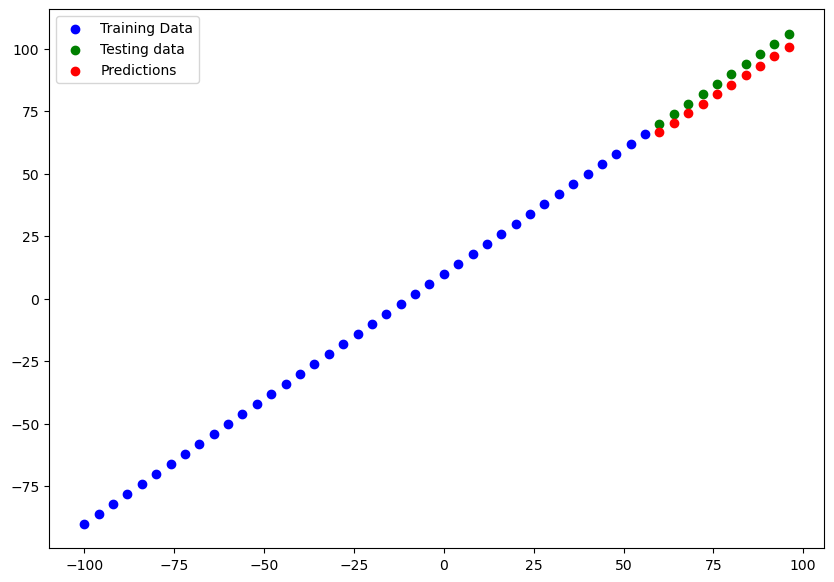

In [50]:
# make predictions and plot
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
# evaluate
results_3 = regression_metrics(y_test, y_preds_3)
results_3

MAE:  4.212171
MSE:  18.065277


## Tracking your experiements

One really good habit in machine learning modeling is to track the results of your experiements

Tools:
* TensorBoard - component of TensorFlow library to help track modeling experiments
* Weights & Biases - a tool for tracking various experiments and plugs into TensorBoard

## Savings our models

Share them with others or implement them in various systems

1. SavedModel format
2. HDF5 format

In [52]:
# Save model in SavedModel format
model_2.save("models/")

# Save model in HDF5 format
model_2.save("models/model_HDF5.h5")

INFO:tensorflow:Assets written to: models/assets


## Loading in a saved model

In [53]:
# Load in SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("models")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compare model 2 predictions to SavedModel format to test/confirm theyre the same models
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 32ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [55]:
# Load in the model in HDF5 format
loaded_h5_format = tf.keras.models.load_model("models/model_HDF5.h5")

In [56]:
loaded_h5_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [57]:
# compare prediciton outputs
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

loaded_h5_format_preds == model_2.predict(X_test)

1/1 [==============================] - 0s 15ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A Larger example

In [58]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

**NOTE:** I have stored the dataset locally at `data/insurance.csv`. The source of the file was a Kaggle competition and the file was hosted on Github <a href="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv">here.</a>

In [59]:
# read in csv file
insurance = pd.read_csv("data/insurance.csv")

In [60]:
# view a bit of the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
# One hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [62]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [63]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [64]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [65]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
len(X), len(X_train)

(1338, 1070)

In [69]:
# build a neural network
tf.random.set_seed(42)

# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 8668.2529 - mae: 8668.2529
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7872.6729 - mae: 7872.6729
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7605.7754 - mae: 7605.7754
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7733.2759 - mae: 7733.2759
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7693.7720 - mae: 7693.7720
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7643.5728 - mae: 7643.5728
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7550.4019 - mae: 7550.4019
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7759.6880 - mae: 7759.6880
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7597.7607 - mae: 7597.7607
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7781.0171 - mae: 7781.017

34/34 [==============================] - 0s 5ms/step - loss: 7286.9424 - mae: 7286.9424
Epoch 83/100
34/34 [==============================] - 0s 5ms/step - loss: 7337.1313 - mae: 7337.1313
Epoch 84/100
34/34 [==============================] - 0s 5ms/step - loss: 7415.5625 - mae: 7415.5625
Epoch 85/100
34/34 [==============================] - 0s 5ms/step - loss: 7408.2954 - mae: 7408.2954
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 7534.9976 - mae: 7534.9976
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 7155.4390 - mae: 7155.4390
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 7157.6294 - mae: 7157.6294
Epoch 89/100
34/34 [==============================] - 0s 5ms/step - loss: 7399.5435 - mae: 7399.5435
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 7035.7153 - mae: 7035.7153
Epoch 91/100
34/34 [==============================] - 0s 5ms/step - loss: 7202.0327 - mae: 7202.0327
Epo

In [71]:
# Check the results of the inusrance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 7056.7808 - mae: 7056.7808


[7056.78076171875, 7056.78076171875]

Our model is performing very poorly. Need to improve the model...

In [77]:
# Create the model again
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                         metrics=["mae"])

# fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 13ms/step - loss: 11180.4756 - mae: 11180.4756
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 7634.3853 - mae: 7634.3853
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 7315.1484 - mae: 7315.1484
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 7071.5210 - mae: 7071.5210
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 6830.5054 - mae: 6830.5054
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 6554.1636 - mae: 6554.1636
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 6343.4785 - mae: 6343.4785
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 6150.3506 - mae: 6150.3506
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 5910.0923 - mae: 5910.0923
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 5645.6621 - mae: 5645.6

34/34 [==============================] - 0s 8ms/step - loss: 2073.8501 - mae: 2073.8501
Epoch 83/100
34/34 [==============================] - 0s 8ms/step - loss: 2068.1492 - mae: 2068.1492
Epoch 84/100
34/34 [==============================] - 0s 8ms/step - loss: 2061.5344 - mae: 2061.5342
Epoch 85/100
34/34 [==============================] - 0s 8ms/step - loss: 2056.4104 - mae: 2056.4104
Epoch 86/100
34/34 [==============================] - 0s 8ms/step - loss: 2080.9878 - mae: 2080.9878
Epoch 87/100
34/34 [==============================] - 0s 8ms/step - loss: 2108.7656 - mae: 2108.7656
Epoch 88/100
34/34 [==============================] - 0s 8ms/step - loss: 2107.6125 - mae: 2107.6125
Epoch 89/100
34/34 [==============================] - 0s 7ms/step - loss: 2101.2146 - mae: 2101.2146
Epoch 90/100
34/34 [==============================] - 0s 7ms/step - loss: 2239.4133 - mae: 2239.4133
Epoch 91/100
34/34 [==============================] - 0s 7ms/step - loss: 2093.6335 - mae: 2093.6335
Epo

In [78]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 1839.5562 - mae: 1839.5562


[1839.55615234375, 1839.55615234375]

In [85]:
# Create the model a 3rd time
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                         metrics=["mae"])

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 13146.0967 - mae: 13146.0967
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 11915.5439 - mae: 11915.5439
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 9423.9736 - mae: 9423.9736
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 7599.6675 - mae: 7599.6675
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7428.0933 - mae: 7428.0933
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 7379.9189 - mae: 7379.9189
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7327.5640 - mae: 7327.5640
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 7280.7285 - mae: 7280.7285
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7232.2104 - mae: 7232.2104
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7183.1812 - mae: 718

34/34 [==============================] - 0s 7ms/step - loss: 3546.2639 - mae: 3546.2639
Epoch 83/100
34/34 [==============================] - 0s 7ms/step - loss: 3531.6187 - mae: 3531.6187
Epoch 84/100
34/34 [==============================] - 0s 7ms/step - loss: 3539.3694 - mae: 3539.3694
Epoch 85/100
34/34 [==============================] - 0s 7ms/step - loss: 3514.7634 - mae: 3514.7634
Epoch 86/100
34/34 [==============================] - 0s 7ms/step - loss: 3519.6130 - mae: 3519.6130
Epoch 87/100
34/34 [==============================] - 0s 7ms/step - loss: 3499.7197 - mae: 3499.7197
Epoch 88/100
34/34 [==============================] - 0s 7ms/step - loss: 3494.0278 - mae: 3494.0278
Epoch 89/100
34/34 [==============================] - 0s 7ms/step - loss: 3490.4917 - mae: 3490.4915
Epoch 90/100
34/34 [==============================] - 0s 7ms/step - loss: 3484.7502 - mae: 3484.7502
Epoch 91/100
34/34 [==============================] - 0s 7ms/step - loss: 3481.3521 - mae: 3481.3521
Epo

Text(0.5, 0, 'epochs')

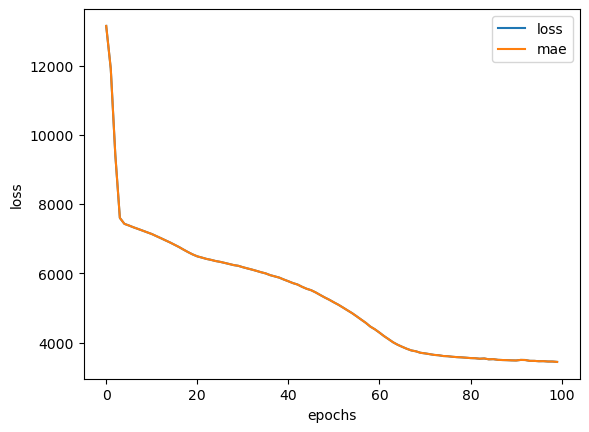

In [86]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> How long should you train for?

It depends... really.

TensorFlow has a solution, [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization

If you're not sure which to use, try both.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in dataframe
insurance = pd.read_csv("data/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we'll use some sklearn.

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
# Passing in classes designed for transformation
# MinMaxScaler provides a means of keeping the distribution or spread of data but normalizing the values between 0 and 1
# OneHotEncoding converts text values into numeric values by expanding columns and using binary values to indicate if it is or isn't
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # normalize values in these columns between 0 and 1 but keep distribution
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# create dataset splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [91]:
# look at data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Data is normalized and one hot encoded.

Build a NN...

In [94]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 13243.0137 - mae: 13243.0137
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 11561.7305 - mae: 11561.7305
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 8190.6948 - mae: 8190.6948
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7603.6523 - mae: 7603.6523
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 7117.8115 - mae: 7117.8115
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 6528.1455 - mae: 6528.1455
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 5620.5269 - mae: 5620.5269
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 4467.2192 - mae: 4467.2192
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 3754.7573 - mae: 3754.7573
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 3675.2217 - mae: 3675

34/34 [==============================] - 0s 9ms/step - loss: 3493.3577 - mae: 3493.3577
Epoch 83/100
34/34 [==============================] - 0s 8ms/step - loss: 3494.6904 - mae: 3494.6904
Epoch 84/100
34/34 [==============================] - 0s 8ms/step - loss: 3498.8044 - mae: 3498.8044
Epoch 85/100
34/34 [==============================] - 0s 8ms/step - loss: 3482.2119 - mae: 3482.2119
Epoch 86/100
34/34 [==============================] - 0s 8ms/step - loss: 3485.2654 - mae: 3485.2654
Epoch 87/100
34/34 [==============================] - 0s 8ms/step - loss: 3487.7688 - mae: 3487.7688
Epoch 88/100
34/34 [==============================] - 0s 8ms/step - loss: 3485.1741 - mae: 3485.1741
Epoch 89/100
34/34 [==============================] - 0s 9ms/step - loss: 3497.6448 - mae: 3497.6448
Epoch 90/100
34/34 [==============================] - 0s 8ms/step - loss: 3492.0601 - mae: 3492.0601
Epoch 91/100
34/34 [==============================] - 0s 8ms/step - loss: 3487.4607 - mae: 3487.4607
Epo

In [98]:
# Evaluate our insurance model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3185.2747 - mae: 3185.2747


[3185.274658203125, 3185.274658203125]